In [7]:
from anotherJEPA3 import TrajectoryDataset, flip_and_shift_augmentation
import random
import torch
import PIL
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
dataset = TrajectoryDataset('../data/states.npy', '../data/actions.npy')

states, actions = dataset[8]  # This will print "augmenting"

wall_non_zeros = torch.nonzero(states[-1, 1, 0, 5:-5] != 0)
wall_min = wall_non_zeros.min().item()
wall_max = wall_non_zeros.max().item()

wall_pos = int((wall_min+wall_max)/2)




print(int((wall_min+wall_max)/2))

29


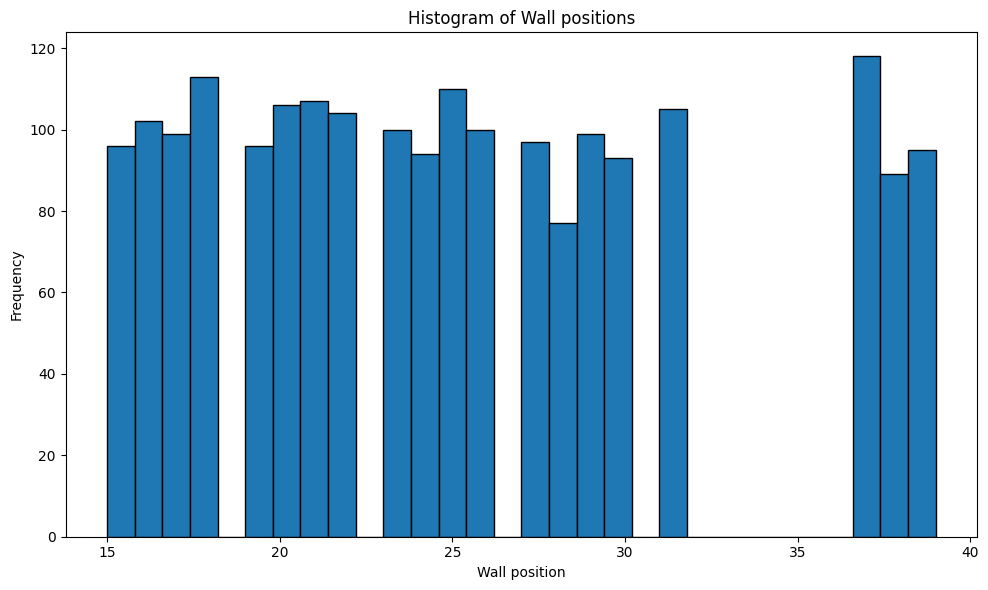

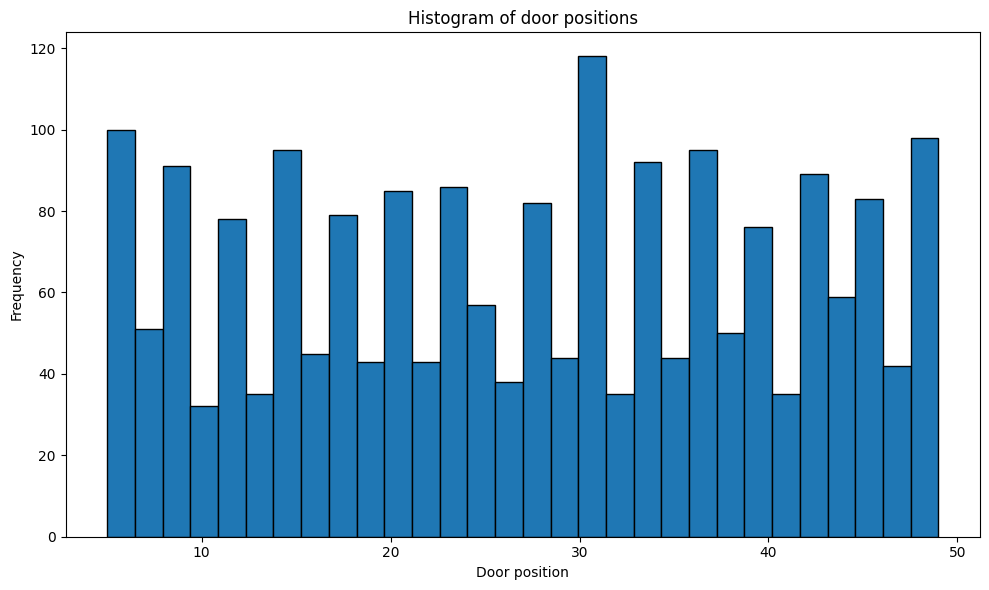

In [36]:

# Load the dataset
dataset = TrajectoryDataset('../data/states.npy', '../data/actions.npy')

# Collect means for each datapoint
wall_position_means = []
door_position_means = []

# Iterate through the dataset
for i in range(len(dataset)):
    states, _ = dataset[i]
    # Calculate the mean of the states tensor
    wall_non_zeros = torch.nonzero(states[-1, 1, 0, 5:-5] != 0)
    wall_min = wall_non_zeros.min().item()
    wall_max = wall_non_zeros.max().item()
    wall_pos = int((wall_min+wall_max)/2)
    wall_position_means.append(wall_pos)

    door_zeros, _, _ = torch.nonzero(states[-1, 1, 5:-5, torch.nonzero(states[-1, 1, 0, 5:-5] != 0)+5] == 0, as_tuple=True)
    door_min = door_zeros.min().item()
    door_max = door_zeros.max().item()
    door_pos = int((door_min+door_max)/2)
    door_position_means.append(door_pos)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(wall_position_means, bins=30, edgecolor='black')
plt.title('Histogram of Wall positions')
plt.xlabel('Wall position')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('wall_position_histogram.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(door_position_means, bins=30, edgecolor='black')
plt.title('Histogram of door positions')
plt.xlabel('Door position')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('door_position_histogram.png')
plt.show()

KeyboardInterrupt: 

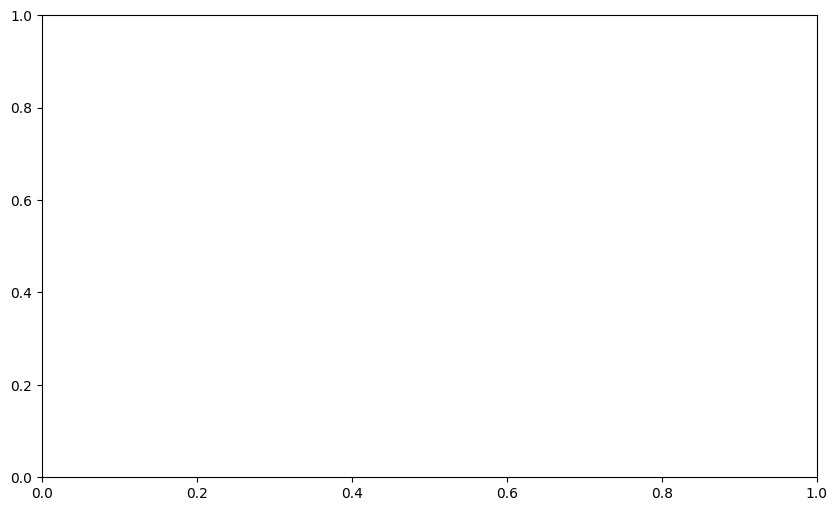

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(door_position_means, bins=30, edgecolor='black')
plt.title('Histogram of door positions')
plt.xlabel('Door position')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('door_position_histogram.png')
plt.show()

21


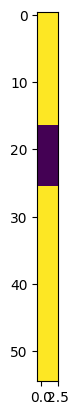

In [28]:
dataset = TrajectoryDataset('../data/states.npy', '../data/actions.npy')

states, actions = dataset[8]  # This will print "augmenting"

wall_non_zeros = torch.nonzero(states[-1, 1, 0, 5:-5] != 0)

plt.imshow(states[-1, 1, 5:-5, torch.nonzero(states[-1, 1, 0, 5:-5] != 0)+5].numpy())



door_zeros, _, _ = torch.nonzero(states[-1, 1, 5:-5, torch.nonzero(states[-1, 1, 0, 5:-5] != 0)+5] == 0, as_tuple=True)
door_min = door_zeros.min().item()
door_max = door_zeros.max().item()
door = int((door_min+door_max)/2)
print(door)

In [16]:
torch.nonzero(states[-1, 1, 0, 5:-5] != 0)

tensor([[28],
        [29],
        [30]])

In [14]:
states[-1, 1, 5:-5, 5:-5] != 0

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])